<a href="https://colab.research.google.com/github/yasmienAshraf/Task-Scheduling-Using-Ant-Colony-Optimization/blob/main/Task_Scheduling_Using_Ant_Colony_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task Scheduling Using Ant Colony Optimization (ACO)

Task scheduling is a fundamental problem in cloud computing, where multiple tasks need to be allocated efficiently to virtual machines (VMs) to minimize execution time and balance workloads. The Ant Colony Optimization (ACO) algorithm has been widely used to solve scheduling problems due to it’s ability to find near-optimal solutions iteratively through pheromone-based learning.


In this study, we implement and analyze the ACO algorithm for task scheduling, aiming to minimize Makespan (total execution time) and balance workload distribution among VMs. We compare different heuristic strategies to evaluate their effectiveness in improving scheduling efficiency. Additionally, we analyze the algorithm’s performance using different task sizes and iterations to determine its scalability and robustness. This report presents the methodology used for task scheduling, experimental results, and a comparative analysis of different heuristic approaches. The findings provide insights into how ACO is efficient in cloud scheduling environments.


----------------------------------------


#1- ACO for 10 tasks for better understanding

# === Parameters ===

In [11]:
import numpy as np

# ===================== Parameters =====================
num_tasks = 10  # Number of tasks
num_vms = 10  # Number of virtual machines
pheromone_init = 0.1  # Initial pheromone value
alpha = 0.3  # Pheromone influence
beta = 1  # Heuristic influence (Time + Load)
rho = 0.4  # Pheromone evaporation rate
Q = 100  # Pheromone deposit amount
iterations = 100  # Maximum number of iterations
stagnation_limit = 10  # Stop if no improvement for this many iterations
num_instances = 20  # Number of instances to test

# Lists to store final results for all instances
makespan_values = []
imbalance_values = []

# === Functions ===

In [12]:
# ===================== Functions =====================
def generate_time_matrix(n, m, min_time=5, max_time=10):
    return np.random.randint(min_time, max_time + 1, size=(n, m))

def initialize_pheromone_matrix(n, m, init_value=pheromone_init):
    return np.full((n, m), init_value, dtype=float)

def compute_imbalance(loads):
    max_load = np.max(loads)
    min_load = np.min(loads)
    avg_load = np.mean(loads)
    return (max_load + min_load) / avg_load if avg_load != 0 else 0

def compute_makespan(loads):
    return np.max(loads)

def select_vm(pheromone_matrix, times, loads, task):
    probabilities = []
    for vm in range(len(times[task])):
        tau = pheromone_matrix[task, vm] ** alpha
        eta = (1 / (times[task, vm] + loads[vm])) ** beta
        probabilities.append(tau * eta)

    probabilities = np.array(probabilities) / np.sum(probabilities)
    return np.random.choice(len(times[task]), p=probabilities) + 1

# === ACO Execution ===

In [13]:
# ===================== ACO Execution =====================
print("\nRunning ACO for 20 Instances of 10 Tasks...\n")

for instance in range(num_instances):
    print(f"Instance {instance+1}/{num_instances}: {num_tasks} tasks")
    print("-" * 50)

    time_matrix = generate_time_matrix(num_tasks, num_vms)
    pheromone_matrix = initialize_pheromone_matrix(num_tasks, num_vms)
    best_makespan = float("inf")
    best_loads = None
    best_assignments = None

    # Print the generated time matrix
    print("Time Matrix:")
    for row in time_matrix:
        print(" ".join(f"{val:2d}" for val in row))
    print("-" * 50)

    stagnation_count = 0
    for t in range(iterations):
        loads = np.zeros(num_vms)
        task_assignments = []

        for task in range(num_tasks):
            selected_vm = select_vm(pheromone_matrix, time_matrix, loads, task)
            task_assignments.append(selected_vm)
            loads[selected_vm - 1] += time_matrix[task, selected_vm - 1]

        current_makespan = compute_makespan(loads)
        imbalance = compute_imbalance(loads)

        if current_makespan < best_makespan:
            best_makespan = current_makespan
            best_loads = loads.copy()
            best_assignments = task_assignments.copy()
            stagnation_count = 0
        else:
            stagnation_count += 1

        pheromone_matrix *= (1 - rho)
        for task, vm in enumerate(task_assignments):
            pheromone_matrix[task, vm - 1] += Q / current_makespan

        if stagnation_count >= stagnation_limit:
            print(f"Converged at iteration {t} for instance {instance+1}")
            break

    # Store makespan and imbalance values for final calculations
    makespan_values.append(best_makespan)
    imbalance_values.append(compute_imbalance(best_loads))

    # Print final results for this instance
    print(f"Best Makespan: {best_makespan}")
    print(f"Final Best Loads on VMs: {best_loads}")
    print(f"Task Assignments as Discrete Vector: {best_assignments}")
    print("-" * 50)


Running ACO for 20 Instances of 10 Tasks...

Instance 1/20: 10 tasks
--------------------------------------------------
Time Matrix:
 7 10  9  8  9  6 10  8  6 10
 8 10  9  5  8  5 10  9  5  9
 5  5  9  6  6 10  8  6 10 10
10  8 10  9  5 10 10  8 10  5
 8 10  8  8  8  6  9  6  6  6
 6 10  6  6 10 10  8  5 10  9
10  5  7  5  8  9  5  5  7  9
 8  9 10  6  5  5  6  6  8  7
 5  9  8  7  7  9  8  5  6  5
 7 10  8  6  8  7  7  8  6  9
--------------------------------------------------
Converged at iteration 30 for instance 1
Best Makespan: 12.0
Final Best Loads on VMs: [10.  9.  7. 11.  8.  6.  0. 12.  6.  0.]
Task Assignments as Discrete Vector: [9, 4, 8, 1, 6, 4, 3, 8, 2, 5]
--------------------------------------------------
Instance 2/20: 10 tasks
--------------------------------------------------
Time Matrix:
 8  5  6  9  7  5  9  5  6  9
 9  7  8  7  5  5 10 10 10 10
 9  6  8  8  7  9  8  6  8  8
 6  8  5  8 10  6 10  8  6  9
 7 10  8  8  6  7  6  6  5  8
 7  5  7  8  6  5  9  9  8  9


# === Compute Final Summary Values ===

In [14]:
# ===================== Compute Final Summary Values =====================
avg_makespan = np.mean(makespan_values)
max_makespan = np.max(makespan_values)
min_makespan = np.min(makespan_values)
avg_imbalance = np.mean(imbalance_values)
max_imbalance = np.max(imbalance_values)
min_imbalance = np.min(imbalance_values)

print("\n================ FINAL SUMMARY =================")
print(f" Average Makespan: {avg_makespan}")
print(f" Max Makespan: {max_makespan}")
print(f" Min Makespan: {min_makespan}")
print(f" Average Imbalance: {avg_imbalance}")
print(f" Max Imbalance: {max_imbalance}")
print(f" Min Imbalance: {min_imbalance}")
print("================================================")



================ FINAL SUMMARY =================
 Average Makespan: 11.7
 Max Makespan: 14.0
 Min Makespan: 9.0
 Average Imbalance: 1.82745556651535
 Max Imbalance: 2.3333333333333335
 Min Imbalance: 1.4705882352941178


# ACO for tasks = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # Task sizes increasing by 10

In [ ]:
import numpy as np

# ===================== Parameters =====================
task_sizes = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # Task sizes increasing by 10
num_vms = 10  # Fixed number of virtual machines
pheromone_init = 0.1  # Initial pheromone value
alpha = 0.3  # Pheromone influence (from research paper)
beta = 1  # Heuristic influence (from research paper)
rho = 0.4  # Evaporation rate (from research paper)
Q = 100  # Pheromone deposit amount (from research paper)
num_instances = 20  # Number of instances per task size
iterations = 100  # Maximum number of iterations
convergence_threshold = 0.01  # Convergence threshold
stagnation_limit = 10  # Stop if no improvement for this many iterations

# ===================== Functions =====================
# Generate a random time matrix
def generate_time_matrix(n, m, min_time=5, max_time=10):
    return np.random.randint(min_time, max_time + 1, size=(n, m))

# Initialize pheromone matrix
def initialize_pheromone_matrix(n, m, init_value=pheromone_init):
    return np.full((n, m), init_value, dtype=float)

# Compute imbalance metric
def compute_imbalance(loads):
    max_load = np.max(loads)
    min_load = np.min(loads)
    avg_load = np.mean(loads)
    return (max_load + min_load) / avg_load if avg_load != 0 else 0

# Compute makespan
def compute_makespan(loads):
    return np.max(loads)

# Select a virtual machine for a task based on pheromone and heuristic information
def select_vm(pheromone_matrix, times, loads, task):
    probabilities = []
    for vm in range(len(times[task])):
        tau = pheromone_matrix[task, vm] ** alpha  # Pheromone effect
        eta = (1 / (times[task, vm] + loads[vm])) ** beta  # New heuristic
        probabilities.append(tau * eta)

    probabilities = np.array(probabilities) / np.sum(probabilities)
    return np.random.choice(len(times[task]), p=probabilities) + 1  # Adjust to start from 1

# ===================== ACO Execution =====================
summary_values = {}

for num_tasks in task_sizes:
    imbalance_values = []
    makespan_values = []
    avg_load_values = []

    for instance in range(num_instances):
        print(f"\nInstance {instance+1}/{num_instances}: {num_tasks} tasks")
        print("-" * 50)

        time_matrix = generate_time_matrix(num_tasks, num_vms)
        pheromone_matrix = initialize_pheromone_matrix(num_tasks, num_vms)
        best_makespan = float("inf")
        best_loads = None
        best_assignments = None

        print("Time Matrix:")
        for row in time_matrix:
            print(" ".join(f"{val:2d}" for val in row))
        print("-" * 50)

        stagnation_count = 0
        for t in range(iterations):
            loads = np.zeros(num_vms)  # Reset loads
            task_assignments = []

            for task in range(num_tasks):
                selected_vm = select_vm(pheromone_matrix, time_matrix, loads, task)
                task_assignments.append(selected_vm)
                loads[selected_vm - 1] += time_matrix[task, selected_vm - 1]

            current_makespan = compute_makespan(loads)
            imbalance = compute_imbalance(loads)

            # Store the best solution
            if current_makespan < best_makespan:
                best_makespan = current_makespan
                best_loads = loads.copy()
                best_assignments = task_assignments.copy()
                stagnation_count = 0
            else:
                stagnation_count += 1

            # Pheromone update
            pheromone_matrix *= (1 - rho)
            for task, vm in enumerate(task_assignments):
                pheromone_matrix[task, vm - 1] += Q / current_makespan

            # Stop if no improvement for stagnation_limit iterations
            if stagnation_count >= stagnation_limit:
                print(f"Converged at iteration {t} for instance {instance+1}")
                break

        # Final results for this instance
        print(f"Best Makespan: {best_makespan}")
        print(f"Final Best Loads on VMs: {best_loads}")
        print(f"Task Assignments as Discrete Vector: {best_assignments}")
        print("-" * 50)

        makespan_values.append(best_makespan)
        imbalance_values.append(compute_imbalance(best_loads))

    # Compute final statistics for all 20 instances
    avg_makespan = np.mean(makespan_values)
    max_makespan = np.max(makespan_values)
    min_makespan = np.min(makespan_values)
    avg_imbalance = np.mean(imbalance_values)
    max_imbalance = np.max(imbalance_values)
    min_imbalance = np.min(imbalance_values)

    # Store summary for this task size
    summary_values[f"summary_{num_tasks}"] = {
        "Average Makespan": avg_makespan,
        "Max Makespan": max_makespan,
        "Min Makespan": min_makespan,
        "Average Imbalance": avg_imbalance,
        "Max Imbalance": max_imbalance,
        "Min Imbalance": min_imbalance
    }



In [20]:
# Print final summary
for key, value in summary_values.items():
    print(f"\nSummary for {key}:")
    for metric, val in value.items():
        print(f"  {metric}: {val}")


Summary for summary_10:
  Average Makespan: 11.3
  Max Makespan: 16.0
  Min Makespan: 8.0
  Average Imbalance: 1.7888079239710855
  Max Imbalance: 2.142857142857143
  Min Imbalance: 1.4705882352941178

Summary for summary_20:
  Average Makespan: 19.9
  Max Makespan: 23.0
  Min Makespan: 16.0
  Average Imbalance: 1.858833228775828
  Max Imbalance: 2.183098591549296
  Min Imbalance: 1.390728476821192

Summary for summary_30:
  Average Makespan: 28.8
  Max Makespan: 32.0
  Min Makespan: 26.0
  Average Imbalance: 1.8829733724793474
  Max Imbalance: 2.1634615384615383
  Min Imbalance: 1.5929203539823007

Summary for summary_40:
  Average Makespan: 36.2
  Max Makespan: 40.0
  Min Makespan: 32.0
  Average Imbalance: 1.8783786234467974
  Max Imbalance: 2.1739130434782608
  Min Imbalance: 1.6433566433566433

Summary for summary_50:
  Average Makespan: 44.95
  Max Makespan: 48.0
  Min Makespan: 40.0
  Average Imbalance: 1.9033636805500798
  Max Imbalance: 2.063953488372093
  Min Imbalance: 1.69

# Figuers to plot the Results.

## 1- Average Makespan

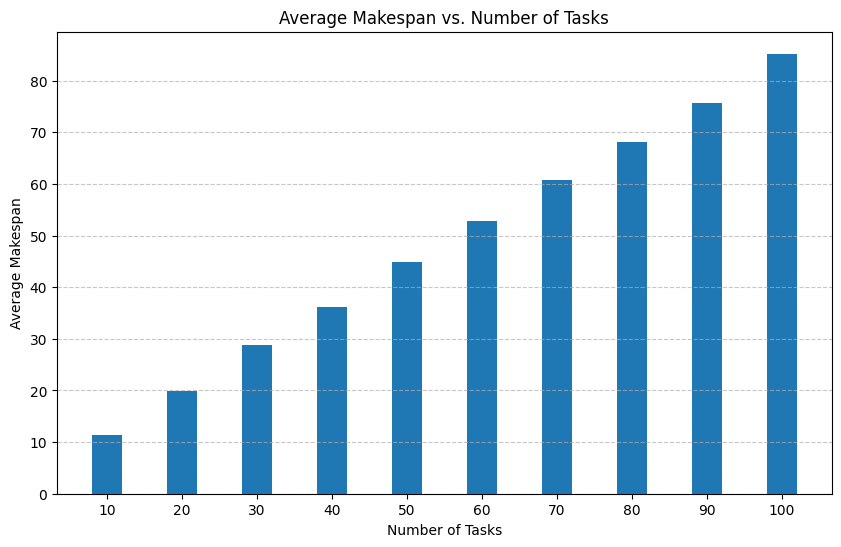

In [21]:
import matplotlib.pyplot as plt

# Extract task sizes and their corresponding average makespan values
task_sizes = list(summary_values.keys())  # Extracting keys (e.g., "summary_10", "summary_20", ...)
task_sizes = [int(k.split("_")[1]) for k in task_sizes]  # Convert to integer
avg_makespan_values = [summary_values[f"summary_{t}"]["Average Makespan"] for t in task_sizes]

# Plot bar chart for Makespan
plt.figure(figsize=(10, 6))
plt.bar(task_sizes, avg_makespan_values, width=4)
plt.xlabel("Number of Tasks")
plt.ylabel("Average Makespan")
plt.title("Average Makespan vs. Number of Tasks")
plt.xticks(task_sizes)  # Ensure all task sizes are labeled
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


## 2- Average Imbalance

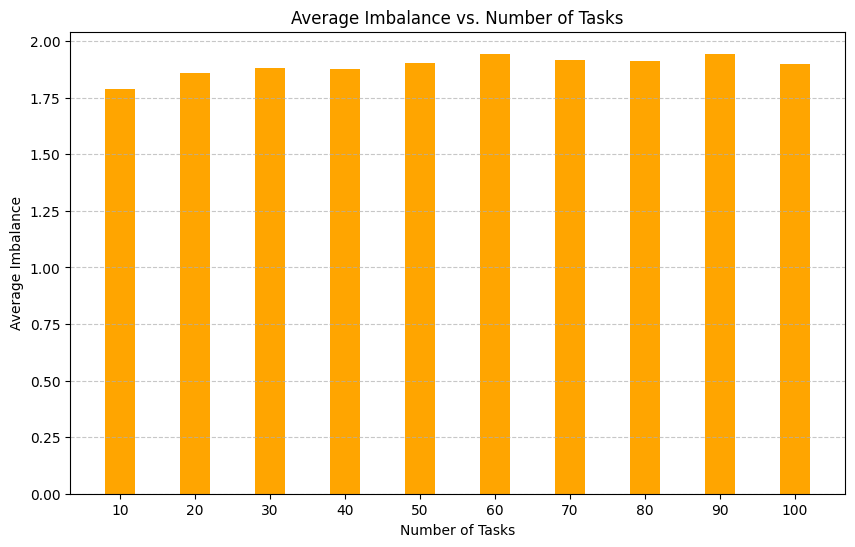

In [22]:
# Extract average imbalance values
avg_imbalance_values = [summary_values[f"summary_{t}"]["Average Imbalance"] for t in task_sizes]

# Plot bar chart for Imbalance
plt.figure(figsize=(10, 6))
plt.bar(task_sizes, avg_imbalance_values, color="orange", width=4)
plt.xlabel("Number of Tasks")
plt.ylabel("Average Imbalance")
plt.title("Average Imbalance vs. Number of Tasks")
plt.xticks(task_sizes)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


## 3- Makespan (Avg, Max, Min) vs Number of Tasks

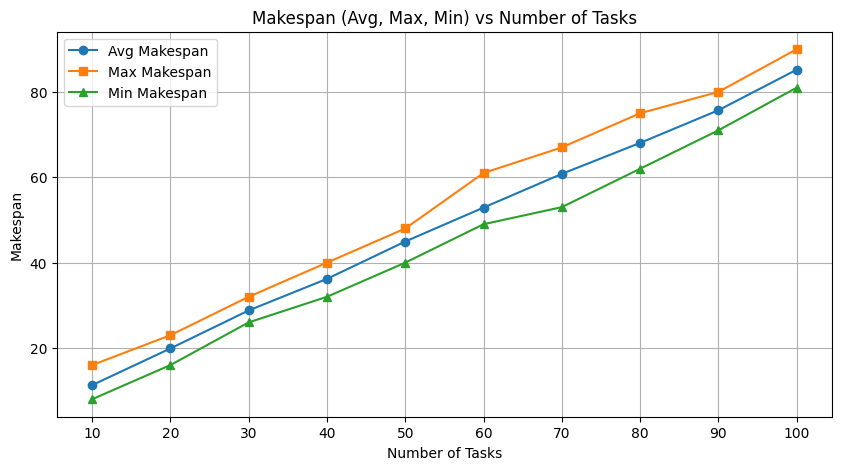

In [23]:
# ===================== Plotting Results =====================
task_labels = [str(t) for t in task_sizes]

avg_makespan = [summary_values[f"summary_{t}"]["Average Makespan"] for t in task_sizes]
max_makespan = [summary_values[f"summary_{t}"]["Max Makespan"] for t in task_sizes]
min_makespan = [summary_values[f"summary_{t}"]["Min Makespan"] for t in task_sizes]

avg_imbalance = [summary_values[f"summary_{t}"]["Average Imbalance"] for t in task_sizes]
max_imbalance = [summary_values[f"summary_{t}"]["Max Imbalance"] for t in task_sizes]
min_imbalance = [summary_values[f"summary_{t}"]["Min Imbalance"] for t in task_sizes]

plt.figure(figsize=(10, 5))
plt.plot(task_labels, avg_makespan, marker='o', linestyle='-', label="Avg Makespan")
plt.plot(task_labels, max_makespan, marker='s', linestyle='-', label="Max Makespan")
plt.plot(task_labels, min_makespan, marker='^', linestyle='-', label="Min Makespan")
plt.xlabel("Number of Tasks")
plt.ylabel("Makespan")
plt.title("Makespan (Avg, Max, Min) vs Number of Tasks")
plt.legend()
plt.grid(True)
plt.show()


## 4- Imbalance (Avg, Max, Min) vs Number of Tasks

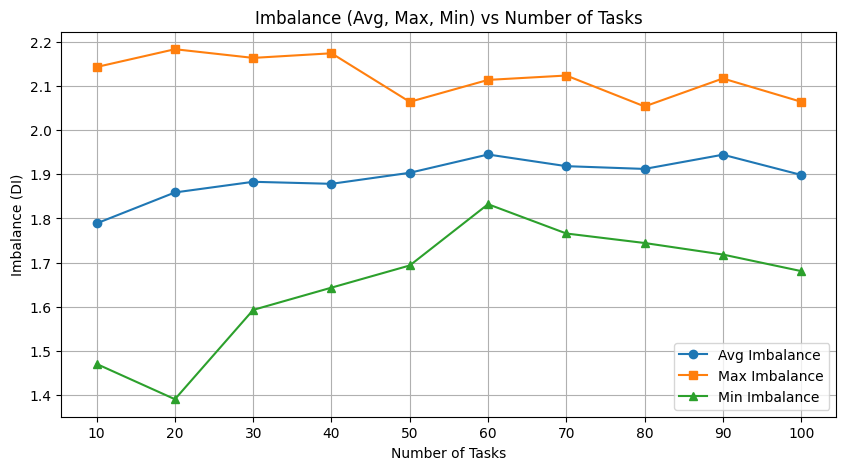

In [24]:
# ========== Plot Imbalance ==========
plt.figure(figsize=(10, 5))
plt.plot(task_labels, avg_imbalance, marker='o', linestyle='-', label="Avg Imbalance")
plt.plot(task_labels, max_imbalance, marker='s', linestyle='-', label="Max Imbalance")
plt.plot(task_labels, min_imbalance, marker='^', linestyle='-', label="Min Imbalance")
plt.xlabel("Number of Tasks")
plt.ylabel("Imbalance (DI)")
plt.title("Imbalance (Avg, Max, Min) vs Number of Tasks")
plt.legend()
plt.grid(True)
plt.show()


#Thank you

------------------------------------------------